In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn

%matplotlib inline

In [2]:
train = pd.read_pickle('../pkl/process.train.pkl')
all_news = pd.read_pickle('../pkl/process.all_news.pkl')
news = pd.read_pickle('../pkl/process.news.pkl')
train[['user_id', 'item_id']]

,user_id,item_id
action_time,,
2017-02-16 00:00:00,11482147,492681
2017-02-16 00:00:00,12070750,457406
2017-02-16 00:00:00,12431632,527476
2017-02-16 00:00:00,13397746,531771
2017-02-16 00:00:00,13794253,510089
2017-02-16 00:00:00,14378544,535335
2017-02-16 00:00:00,1705634,535202
2017-02-16 00:00:00,6943823,478183
2017-02-16 00:00:01,5902475,524378


In [3]:
m_data = pd.merge(train, all_news[['item_id','timestamp','date']], how='left', on='item_id')
m_data = pd.DataFrame(data=m_data.values, columns=m_data.columns, index=train.index)
# m_data.to_pickle('merge_data.pkl')
# m_data['user_id' == '0365F7AE-5048-42B3-BB2C-8E637A380A3E']

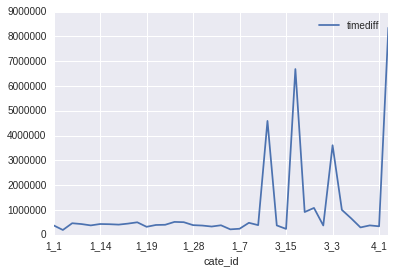

In [4]:
m_data['timediff'] = m_data.timestamp_x - m_data.timestamp_y
(m_data[['timediff']].groupby(m_data.cate_id).sum() / m_data[['timediff']].groupby(m_data.cate_id).count()).plot()

In [6]:
all_news.index = all_news.date
all_news = all_news.sort_index()
news.index = news.date

news = news.sort_index()

In [5]:
# 聚类
m_data[['user_id','cate_id','view','deep_view','collect','share','comment']].groupby(['user_id','cate_id']).sum()
# m_data['score'] = m_data.view * 1 + m_data.deep_view * 2 + m_data.comment * 3 + m_data.collect * 4 + m_data.share * 5
m_data

,user_id,item_id,cate_id,action_type,timestamp_x,view,deep_view,collect,share,comment,timestamp_y,date,timediff
action_time,,,,,,,,,,,,,
2017-02-16 00:00:00,11482147,492681,1_11,view,1487174400,1,0,0,0,0,1486731016,2017-02-10 20:50:16,443384
2017-02-16 00:00:00,12070750,457406,1_14,deep_view,1487174400,0,1,0,0,0,1486257499,2017-02-05 09:18:19,916901
2017-02-16 00:00:00,12431632,527476,1_1,view,1487174400,1,0,0,0,0,1487002729,2017-02-14 00:18:49,171671
2017-02-16 00:00:00,13397746,531771,1_6,deep_view,1487174400,0,1,0,0,0,1487050334,2017-02-14 13:32:14,124066
2017-02-16 00:00:00,13794253,510089,1_27,deep_view,1487174400,0,1,0,0,0,1486876954,2017-02-12 13:22:34,297446
2017-02-16 00:00:00,14378544,535335,1_6,deep_view,1487174400,0,1,0,0,0,1487079269,2017-02-14 21:34:29,95131
2017-02-16 00:00:00,1705634,535202,1_10,view,1487174400,1,0,0,0,0,1487077912,2017-02-14 21:11:52,96488
2017-02-16 00:00:00,6943823,478183,1_3,deep_view,1487174400,0,1,0,0,0,1486530387,2017-02-08 13:06:27,644013
2017-02-16 00:00:01,5902475,524378,1_6,view,1487174401,1,0,0,0,0,1486981875,2017-02-13 18:31:15,192526


In [10]:
m_data['score'] = m_data.view * 1 + m_data.deep_view * 2 + m_data.comment * 3 + m_data.collect * 4 + m_data.share * 5
# m_data[['user_id','item_id','cate_id', 'view', 'deep_view','collect', 'share', 'comment', 'score']].groupby(m_data[['user_id','cate_id']]).sum()
g_data = m_data[['user_id','cate_id','view','deep_view','collect','share','comment','score']].groupby(['user_id','cate_id']).sum()
g_data

view 
 deep_view 
 collect 
 share 
 comment 
 score 
 
 
 user_id 
 cate_id 
 
 
 
 
 
 
 
 
 
 
 0365F7AE-5048-42B3-BB2C-8E637A380A3E 
 1_1 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 1_10 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 1_16 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 1_2 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 1_3 
 4 
 4 
 0 
 0 
 0 
 12 
 
 
 1_9 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 06068254-792D-4AFE-AC6C-DE43DB15D735 
 1_3 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 1_7 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 077F63F3-3DF4-4041-B3C9-7BAB2BDCA795 
 1_1 
 8 
 5 
 0 
 0 
 0 
 18 
 
 
 1_3 
 22 
 20 
 0 
 0 
 0 
 62 
 
 
 1_6 
 3 
 3 
 0 
 0 
 0 
 9 
 
 
 1_9 
 3 
 3 
 0 
 0 
 0 
 9 
 
 
 08f6ea6d2181b902d8cbeccdccf61efc 
 1_5 
 24 
 10 
 0 
 0 
 0 
 44 
 
 
 095A18FB-2C8E-4C00-8F2D-B481CB674ECE 
 1_1 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 096F9140-F748-4DE3-A4C3-EBAAA277144D 
 1_1 
 12 
 8 
 0 
 0 
 0 
 28 
 
 
 1_10 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 1_18 
 12 
 6 
 0 
 0 
 0 
 24 
 
 
 1_5 
 5 
 3 
 0 
 0 
 0 
 11 
 
 
 1_9 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 3_6 
 2 
 1 
 0 
 0 
 0 
 4 
 
 
 3_7 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 0B9DDF98-12A0-45DF-9CF7-F4194BF23282 
 1_1 
 10 
 5 
 0 
 0 
 0 
 20 
 
 
 1_10 
 5 
 1 
 0 
 0 
 0 
 7 
 
 
 1_12 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_18 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_2 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_3 
 15 
 10 
 0 
 0 
 0 
 35 
 
 
 1_9 
 6 
 4 
 0 
 0 
 0 
 14 
 
 
 3_1 
 5 
 0 
 0 
 0 
 0 
 5 
 
 
 0F3D4D6F-A906-4396-BA3B-1E69B0F6867C 
 1_1 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 adcb95bf041f28650217e44295642069 
 1_5 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 1_6 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 afc516c182022de1d5b97eab0e1ded2d 
 1_9 
 8 
 0 
 0 
 0 
 0 
 8 
 
 
 b1ad0229ae7e6e6fbf60d765a33f4224 
 1_5 
 4 
 2 
 0 
 0 
 0 
 8 
 
 
 b229aecf4d60e1d41c53cf76f81b6328 
 1_6 
 2 
 1 
 0 
 0 
 0 
 4 
 
 
 b33521106f7043abb602fd6d979335d8 
 1_1 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 1_10 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 1_2 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 bd7652ef91f0e4c6dc4dbb0fa69b39af 
 1_17 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_5 
 7 
 1 
 0 
 0 
 0 
 9 
 
 
 c28593c24c1b3f0deb277588562a6d53 
 1_17 
 2 
 0 
 0 
 0 
 0 
 2 
 
 
 1_4 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 c409b185f157669cac8de101eb3ba929 
 1_1 
 6 
 1 
 0 
 0 
 0 
 8 
 
 
 1_11 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 1_12 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 1_17 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_2 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_3 
 8 
 5 
 0 
 0 
 0 
 18 
 
 
 1_5 
 23 
 9 
 0 
 0 
 0 
 41 
 
 
 1_6 
 4 
 1 
 0 
 0 
 0 
 6 
 
 
 1_9 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 d47465895418527101d0ca0a44586763 
 1_15 
 28 
 12 
 0 
 0 
 0 
 52 
 
 
 ef443bb4e64d4a93a3babb83fb07cf04 
 1_1 
 6 
 4 
 0 
 0 
 0 
 14 
 
 
 1_10 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 1_11 
 58 
 33 
 0 
 0 
 0 
 124 
 
 
 1_12 
 18 
 7 
 0 
 0 
 0 
 32 
 
 
 1_2 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_7 
 3 
 3 
 0 
 0 
 0 
 9 
 
 
 f69fb63a3673456c9713bff4af597e95 
 1_14 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 1_3 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 
 208598 rows × 6 columns

In [7]:
def get_pickle(path):
    input = open(path, 'rb')
    data = pickle.load(input)
    return data

In [8]:
cdt = get_pickle('../pkl/list.candidate.pkl')
print(len(cdt))

28501


In [12]:
gt_data = g_data.loc[cdt]
# gt_data.loc['ef443bb4e64d4a93a3babb83fb07cf04'].sort_values('score')
gt_data.to_pickle('../pkl/baseline.pkl')
gt_data

view 
 deep_view 
 collect 
 share 
 comment 
 score 
 
 
 user_id 
 cate_id 
 
 
 
 
 
 
 
 
 
 
 0365F7AE-5048-42B3-BB2C-8E637A380A3E 
 1_1 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 1_10 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 1_16 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 1_2 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 1_3 
 4 
 4 
 0 
 0 
 0 
 12 
 
 
 1_9 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 06068254-792D-4AFE-AC6C-DE43DB15D735 
 1_3 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 1_7 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 077F63F3-3DF4-4041-B3C9-7BAB2BDCA795 
 1_1 
 8 
 5 
 0 
 0 
 0 
 18 
 
 
 1_3 
 22 
 20 
 0 
 0 
 0 
 62 
 
 
 1_6 
 3 
 3 
 0 
 0 
 0 
 9 
 
 
 1_9 
 3 
 3 
 0 
 0 
 0 
 9 
 
 
 08f6ea6d2181b902d8cbeccdccf61efc 
 1_5 
 24 
 10 
 0 
 0 
 0 
 44 
 
 
 095A18FB-2C8E-4C00-8F2D-B481CB674ECE 
 1_1 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 096F9140-F748-4DE3-A4C3-EBAAA277144D 
 1_1 
 12 
 8 
 0 
 0 
 0 
 28 
 
 
 1_10 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 1_18 
 12 
 6 
 0 
 0 
 0 
 24 
 
 
 1_5 
 5 
 3 
 0 
 0 
 0 
 11 
 
 
 1_9 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 3_6 
 2 
 1 
 0 
 0 
 0 
 4 
 
 
 3_7 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 0B9DDF98-12A0-45DF-9CF7-F4194BF23282 
 1_1 
 10 
 5 
 0 
 0 
 0 
 20 
 
 
 1_10 
 5 
 1 
 0 
 0 
 0 
 7 
 
 
 1_12 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_18 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_2 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_3 
 15 
 10 
 0 
 0 
 0 
 35 
 
 
 1_9 
 6 
 4 
 0 
 0 
 0 
 14 
 
 
 3_1 
 5 
 0 
 0 
 0 
 0 
 5 
 
 
 0F3D4D6F-A906-4396-BA3B-1E69B0F6867C 
 1_1 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 adcb95bf041f28650217e44295642069 
 1_5 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 1_6 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 afc516c182022de1d5b97eab0e1ded2d 
 1_9 
 8 
 0 
 0 
 0 
 0 
 8 
 
 
 b1ad0229ae7e6e6fbf60d765a33f4224 
 1_5 
 4 
 2 
 0 
 0 
 0 
 8 
 
 
 b229aecf4d60e1d41c53cf76f81b6328 
 1_6 
 2 
 1 
 0 
 0 
 0 
 4 
 
 
 b33521106f7043abb602fd6d979335d8 
 1_1 
 2 
 2 
 0 
 0 
 0 
 6 
 
 
 1_10 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 1_2 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 bd7652ef91f0e4c6dc4dbb0fa69b39af 
 1_17 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_5 
 7 
 1 
 0 
 0 
 0 
 9 
 
 
 c28593c24c1b3f0deb277588562a6d53 
 1_17 
 2 
 0 
 0 
 0 
 0 
 2 
 
 
 1_4 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 c409b185f157669cac8de101eb3ba929 
 1_1 
 6 
 1 
 0 
 0 
 0 
 8 
 
 
 1_11 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 1_12 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 1_17 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_2 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_3 
 8 
 5 
 0 
 0 
 0 
 18 
 
 
 1_5 
 23 
 9 
 0 
 0 
 0 
 41 
 
 
 1_6 
 4 
 1 
 0 
 0 
 0 
 6 
 
 
 1_9 
 3 
 2 
 0 
 0 
 0 
 7 
 
 
 d47465895418527101d0ca0a44586763 
 1_15 
 28 
 12 
 0 
 0 
 0 
 52 
 
 
 ef443bb4e64d4a93a3babb83fb07cf04 
 1_1 
 6 
 4 
 0 
 0 
 0 
 14 
 
 
 1_10 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 1_11 
 58 
 33 
 0 
 0 
 0 
 124 
 
 
 1_12 
 18 
 7 
 0 
 0 
 0 
 32 
 
 
 1_2 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 1_7 
 3 
 3 
 0 
 0 
 0 
 9 
 
 
 f69fb63a3673456c9713bff4af597e95 
 1_14 
 1 
 1 
 0 
 0 
 0 
 3 
 
 
 1_3 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 
 208598 rows × 6 columns